# House Price Regression Analysis

In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load and Inspect Data

In [72]:
df = pd.read_csv('housePrice.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [73]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [75]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

### Drop NaN Values

In [76]:
df.dropna(inplace=True)

### Convert Area to Numeric

In [77]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

### Drop Outliers

<Axes: ylabel='Area'>

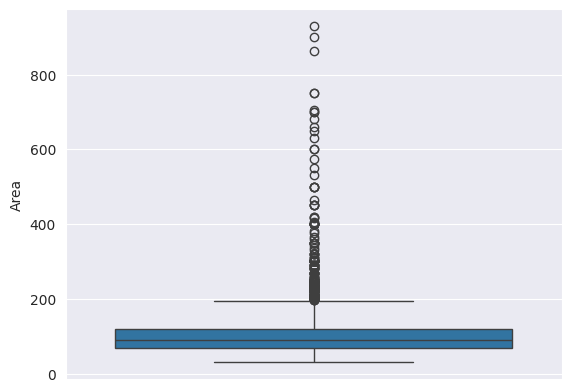

In [78]:
sns.boxplot(df['Area'])

In [79]:
df = df[df['Area'] <= 400]

### Data Inspection After Cleaning

In [80]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


### Drop USD Price Column

In [81]:
df = df.drop(['Price(USD)'], axis=1)

### Split Data into Training and Test Sets

In [82]:
from sklearn.model_selection import train_test_split

x = df.drop('Price', axis=1)
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Combine Training Data for Further Analysis

In [83]:
train_data = x_train.join(y_train)
train_data

,Area,Room,Parking,Warehouse,Elevator,Address,Price
1646,150.0,3,True,True,True,Gheitarieh,1.100000e+10
2119,131.0,3,True,True,True,Railway,5.850000e+09
2215,67.0,1,True,False,True,Beryanak,1.415000e+09
886,78.0,2,True,False,False,Islamshahr,5.500000e+08
2439,60.0,1,False,True,True,Southern Suhrawardi,2.210000e+09
...,...,...,...,...,...,...,...
1112,75.0,2,True,True,True,Shahran,1.980000e+09
1147,44.0,1,True,True,False,Shahran,1.390000e+09
1312,192.0,3,True,True,True,Kamranieh,3.349000e+10
875,235.0,3,True,True,True,Gheitarieh,2.590000e+10


### Visualize the Data

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Room'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

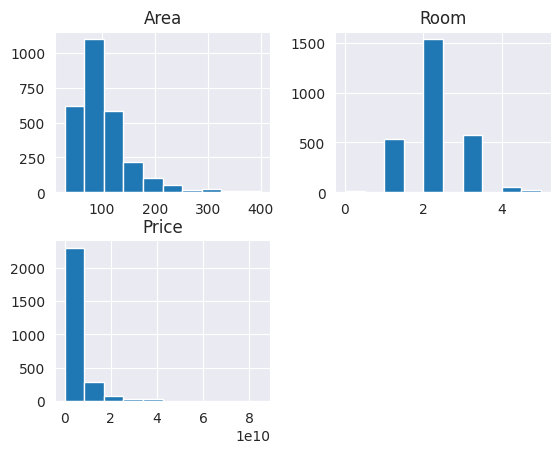

In [84]:
train_data.hist()

### Convert Boolean Columns to Integers

In [85]:
train_data = train_data.astype({col: 'int' for col in train_data.select_dtypes(include=['bool']).columns})

### Correlation Heatmap

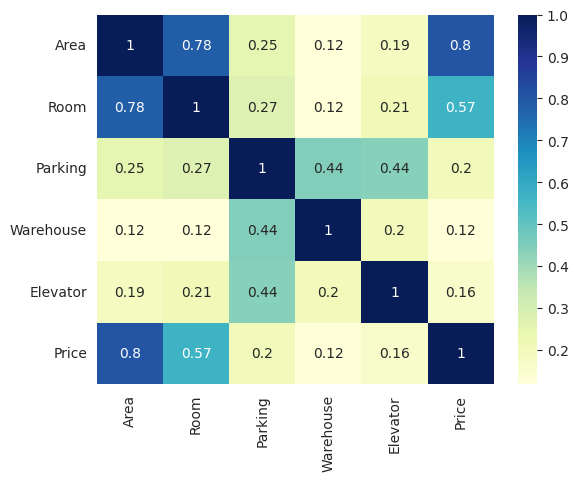

In [86]:
numeric_data = train_data.select_dtypes(include=['number'])

sns.heatmap(numeric_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Log Transformation of Price

In [87]:
train_data['Price'] = np.log(train_data['Price'] + 1)

### Visualize Transformed Data

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Room'}>],
       [<Axes: title={'center': 'Parking'}>,
        <Axes: title={'center': 'Warehouse'}>],
       [<Axes: title={'center': 'Elevator'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

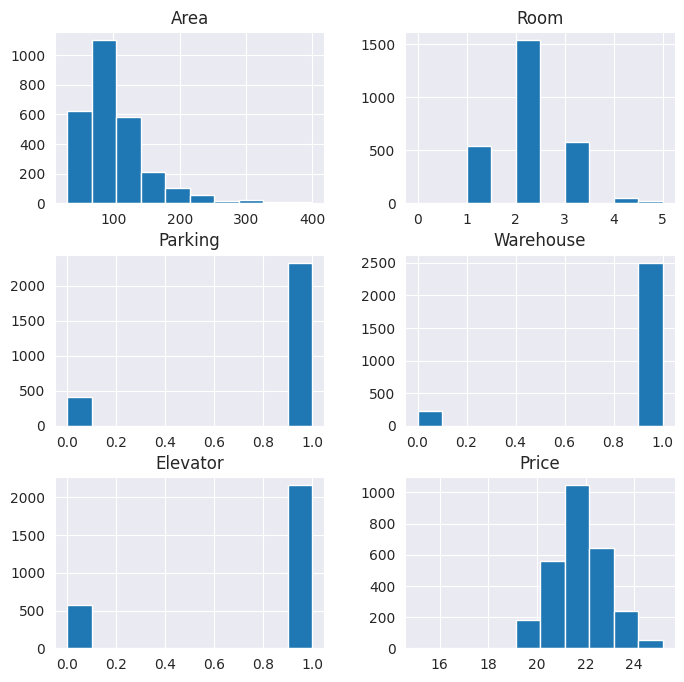

In [88]:
train_data.hist(figsize=(8,8))

### Feature Engineering: Price Per Area

In [89]:
# Apply Feature Engineering to Training Data
x_train['Price_per_Area'] = y_train / x_train['Area']
train_data = x_train.copy()
train_data['Price'] = y_train

# Calculate average Price_per_Area for each unique Address in training data
train_data['Average_Price_per_Area'] = train_data.groupby('Address')['Price_per_Area'].transform('mean')
train_data.drop(columns=['Price_per_Area', 'Address'], inplace=True)

x_train = train_data.drop('Price', axis=1)
y_train = train_data['Price']

### Drop Address Column

In [90]:
# train_data = train_data.drop('Address', axis=1)

### Prepare Test Data

In [91]:
x_test['Price_per_Area'] = y_test / x_test['Area']
test_data = x_test.copy()
test_data['Price'] = y_test

# Calculate average Price_per_Area for each unique Address in test data
# Use training data's average values for consistency
test_data['Average_Price_per_Area'] = test_data.groupby('Address')['Price_per_Area'].transform(lambda x: train_data['Average_Price_per_Area'].mean())
test_data.drop(columns=['Price_per_Area', 'Address'], inplace=True)

x_test = test_data.drop('Price', axis=1)
y_test = test_data['Price']

### Train a Linear Regression Model

In [92]:
from sklearn.linear_model import LinearRegression

x_train , y_train = train_data.drop('Price', axis=1), train_data['Price']

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

### Model Evaluation

In [93]:
reg.score(x_test, y_test)

0.6071877670258692

In [94]:
from sklearn.metrics import mean_squared_error, r2_score

In [95]:
y_pred = reg.predict(x_test)

# Evaluate the Model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 Score: {r2}")
print(f"Mean Squared Error: {mse}")

R^2 Score: 0.6071877670258692
Mean Squared Error: 1.4215624424756224e+19


### Apply Multiple Regression Models


In [104]:
### Standardize and Transform Data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform both training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply PCA to reduce dimensionality (if needed)
pca = PCA(n_components=0.95)  # Adjust n_components as needed
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# Apply PolynomialFeatures to training and test data for Polynomial Regression
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

### Retrain and Evaluate Models
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Define a function to evaluate models
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    return r2, mse


# Train and evaluate Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_r2, ridge_mse = evaluate_model(ridge_reg, x_train_scaled, y_train, x_test_scaled, y_test)

# Train and evaluate Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_r2, lasso_mse = evaluate_model(lasso_reg, x_train_scaled, y_train, x_test_scaled, y_test)

# Train and evaluate Decision Tree Regression
tree_reg = DecisionTreeRegressor()
tree_r2, tree_mse = evaluate_model(tree_reg, x_train, y_train, x_test, y_test)

# Train and evaluate Random Forest Regression
forest_reg = RandomForestRegressor(n_estimators=100)
forest_r2, forest_mse = evaluate_model(forest_reg, x_train, y_train, x_test, y_test)

# Train and evaluate Gradient Boosting Regression
boosting_reg = GradientBoostingRegressor(n_estimators=100)
boosting_r2, boosting_mse = evaluate_model(boosting_reg, x_train, y_train, x_test, y_test)

# Train and evaluate Polynomial Regression
poly_reg = LinearRegression()
poly_r2, poly_mse = evaluate_model(poly_reg, x_train_poly, y_train, x_test_poly, y_test)

# Print Model Evaluation Results
print("Model Evaluation Results:")
print(f"Ridge Regression - R^2: {ridge_r2:.3f}, MSE: {ridge_mse:.3f}")
print(f"Lasso Regression - R^2: {lasso_r2:.3f}, MSE: {lasso_mse:.3f}")
print(f"Decision Tree Regression - R^2: {tree_r2:.3f}, MSE: {tree_mse:.3f}")
print(f"Random Forest Regression - R^2: {forest_r2:.3f}, MSE: {forest_mse:.3f}")
print(f"Gradient Boosting Regression - R^2: {boosting_r2:.3f}, MSE: {boosting_mse:.3f}")
print(f"Polynomial Regression - R^2: {poly_r2:.3f}, MSE: {poly_mse:.3f}")


Model Evaluation Results:
Ridge Regression - R^2: 0.607, MSE: 14217663859302428672.000
Lasso Regression - R^2: 0.607, MSE: 14215624436881592320.000
Decision Tree Regression - R^2: 0.494, MSE: 18319467461266489344.000
Random Forest Regression - R^2: 0.574, MSE: 15400662292154671104.000
Gradient Boosting Regression - R^2: 0.560, MSE: 15940894854913722368.000
Polynomial Regression - R^2: 0.538, MSE: 16727719862664075264.000
